# FinalProject. Cardiovascular diseases: risk factors and attempts of prediction.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Part I. Global mortality, deaths due to cardiovascular diseases and risk factors.

Summary tables of mortality estimates by cause, age and sex, by country, 2000–2015

http://www.who.int/healthinfo/global_burden_disease/estimates/en/

### *Data Preparation and Cleaning - Part I - 1*

In [2]:
Causes_of_death2000 = pd.read_excel('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\GHE2015_Deaths-2000-country.xls', sheet_name=1)

In [3]:
Causes_of_death2000.head(20)

World Health Organization  \
NaN     NaN      NaN   Department of Information, Evidence and Research   
                 NaN                                         March 2017   
                 NaN                                                NaN   
                 NaN              Estimated deaths ('000) by cause, sex   
                 NaN                     and WHO Member State (1), 2000   
Sex     GHE code NaN                                          GHE cause   
NaN     NaN      NaN                                                NaN   
                 NaN                                                NaN   
Persons NaN      NaN                              Population ('000) (2)   
        0        NaN                                         All Causes   
        10       I.   Communicable, maternal, perinatal and nutritio...   
        20       NaN                                                 A.   
        30       NaN                                                NaN   
        40       NaN                                                NaN   
        50       NaN                                                NaN   
        60       NaN                                                NaN   
        70       NaN                                                NaN   
        80       NaN                                                NaN   
        85       NaN                                                NaN   
        90       NaN                                                NaN   

                                             Unnamed: 1          Unnamed: 2  \
NaN     NaN      NaN                                NaN                 NaN   
                 NaN                                NaN                 NaN   
                 NaN                                NaN                 NaN   
                 NaN                                NaN                 NaN   
                 NaN                                NaN                 NaN   
Sex     GHE code NaN                                NaN                 NaN   
NaN     NaN      NaN                                NaN                 NaN   
                 NaN                                NaN                 NaN   
Persons NaN      NaN                                NaN                 NaN   
        0        NaN                                NaN                 NaN   
        10       I.                                 NaN                 NaN   
        20       NaN  Infectious and parasitic diseases                 NaN   
        30       NaN                                 1.        Tuberculosis   
        40       NaN                                 2.  STDs excluding HIV   
        50       NaN                                NaN                  a.   
        60       NaN                                NaN                  b.   
        70       NaN                                NaN                  c.   
        80       NaN                                NaN                  d.   
        85       NaN                                NaN                  e.   
        90       NaN                                NaN                  f.   

                                                             Unnamed: 3  \
NaN     NaN      NaN                                                NaN   
                 NaN                                                NaN   
                 NaN                                                NaN   
                 NaN                                                NaN   
                 NaN                                                NaN   
Sex     GHE code NaN  Member State\n(See Notes for explanation of co...   
NaN     NaN      NaN                                         ISO-3 Code   
                 NaN                                                NaN   
Persons NaN      NaN                                                NaN   
        0        NaN                                        

In [4]:
Causes_of_death2000.shape

(627, 187)

In [5]:
print(Causes_of_death2000['World Health Organization'].unique())
print(Causes_of_death2000['Unnamed: 1'].unique())
print(Causes_of_death2000['Unnamed: 2'].unique())

['Department of Information, Evidence and Research' 'March 2017' nan
 "Estimated deaths ('000) by cause, sex" 'and WHO Member State (1), 2000'
 'GHE cause' "Population ('000) (2)" 'All Causes'
 'Communicable, maternal, perinatal and nutritional conditions' 'A.' 'B.'
 'C.' 'D.' 'E.' 'Noncommunicable diseases' 'F.' 'G.' 'H.' 'I.' 'J.' 'K.'
 'L.' 'M.' 'N.' 'O.' 'P.' 'Injuries']
[nan 'Infectious and parasitic diseases' '1.' '2.' '3.' '4.' '5.' '6.'
 '7.' '8.' '9.' '10.' '11.' '12.' 'Respiratory Infectious '
 'Maternal conditions' 'Neonatal conditions' 'Nutritional deficiencies'
 'Malignant neoplasms' '13.' '14.' '15.' '16.' '17.' '18.' '19.' '20.'
 '21.' '22.' '23.' '24.' 'Other neoplasms' 'Diabetes mellitus'
 'Endocrine, blood, immune disorders' 'Mental and substance use disorders'
 'Neurological conditions' 'Sense organ diseases'
 'Cardiovascular diseases' 'Respiratory diseases' 'Digestive diseases'
 'Genitourinary diseases' 'Skin diseases' 'Musculoskeletal diseases'
 'Congenital anomali

In [6]:
all_causes = Causes_of_death2000.iloc[9].values[4:]
all_causes

array([249.75736333, 21.2187077709, 146.427147145, 290.077680216,
       0.522158227599, 282.77542193, 24.9690091875, 128.501707317,
       76.6868652117, 55.0923000742, 1.66727006096, 1.89647043305,
       917.350454481, 2.82909086863, 148.079020096, 104.618856595,
       1.5125812757, 90.3156857051, 5.08251776403, 76.2088283493,
       31.1378358794, 27.0103536542, 1034.84372847, 0.947324959773,
       118.184430114, 189.674130754, 98.7781013816, 115.615997775,
       230.570335084, 217.609404902, 2.55113861327, 69.3402256634,
       146.207840453, 79.3736470304, 8053.5478388, 208.640683853,
       5.12327210679, 41.6399594309, 15.7363862497, 266.91075308,
       50.2453391137, 77.1057900405, 6.56568561346, 108.880224869,
       205.194741623, 710.000339861, 56.8587455814, 7.31146127888,
       46.5554808405, 66.0047438094, 442.0800418, 38.4728680619,
       7.53698062212, 57.8758074986, 18.1558166703, 979.204344657,
       4.82869961393, 49.1389635208, 529.830441627, 13.6595146797,


Extracting cause of death - **Cardiovascular diseases (CVD)**

In [7]:
def clean_data(data):
    qq = data.copy()
    countries = data.iloc[5].values[4:]
    population = data.iloc[8].values[4:]
    all_causes = data.iloc[9].values[4:]
    qq.dropna()
    mask1 = qq['Unnamed: 1'].str.contains('Cardiovascular diseases', na = False)
    qqc = qq[mask1]
    cause_cardio = qqc.iloc[0].values[4:]
    d = {'countries': countries, 'all causes': all_causes, 'cause cardio': cause_cardio, 'population': population}
    return pd.DataFrame(d)    

In [8]:
data2000 = clean_data(Causes_of_death2000)

In [9]:
Causes_of_death2005 = pd.read_excel('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\GHE2015_Deaths-2005-country.xls', sheet_name=1)
Causes_of_death2010 = pd.read_excel('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\GHE2015_Deaths-2010-country.xls', sheet_name=1)
Causes_of_death2015 = pd.read_excel('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\GHE2015_Deaths-2015-country.xls', sheet_name=1)

In [10]:
print(Causes_of_death2005.shape, 
      Causes_of_death2010.shape, 
      Causes_of_death2015.shape)

(627, 187) (627, 187) (627, 187)


In [11]:
data2005 = clean_data(Causes_of_death2005)
data2010 = clean_data(Causes_of_death2010)
data2015 = clean_data(Causes_of_death2015)

In [12]:
data2000.rename(columns={'all causes': 'all2000', 'cause cardio': 'cardio2000', 'population': 'population2000'}, inplace = True)
data2005.rename(columns={'all causes': 'all2005', 'cause cardio': 'cardio2005', 'population': 'population2005'}, inplace = True)
data2010.rename(columns={'all causes': 'all2010', 'cause cardio': 'cardio2010', 'population': 'population2010'}, inplace = True)
data2015.rename(columns={'all causes': 'all2015', 'cause cardio': 'cardio2015', 'population': 'population2015'}, inplace = True)

In [13]:
data2005.loc[data2005['countries'] == 'Czech Republic']
data2005['countries'][43] = 'Czechia'
data2005.countries.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [14]:
data = data2000.merge(data2005, on='countries', how='inner')
data = data.merge(data2010, on='countries', how='inner')
data = data.merge(data2015, on='countries', how='inner')
data.head()

,all2000,cardio2000,countries,population2000,all2005,cardio2005,population2005,all2010,cardio2010,population2010,all2015,cardio2015,population2015
0,249.757,33.5378,Afghanistan,19702,253.554,41.6761,24400,261.923,47.0393,27962,259.956,55.0061,32527
1,21.2187,10.7373,Albania,3122,22.7499,12.5973,3082,20.9535,11.4135,2902,21.8065,11.6932,2897
2,146.427,48.3884,Algeria,31184,158.492,53.6709,33268,175.575,59.8031,36036,195.904,69.2896,39667
3,290.078,20.8035,Angola,15059,314.963,24.4419,17913,335.743,28.5402,21220,341.315,33.1786,25022
4,0.522158,0.180695,Antigua and Barbuda,78,0.53936,0.19641,83,0.539891,0.181528,87,0.553476,0.184536,92


### *Findings - Part I - 1*

In [15]:
data_sum = data.copy()
data_sum = data_sum.sum(axis = 0)
del data_sum['countries']
data_sum

all2000           51964.8
cardio2000        14374.9
population2000    6093454
all2005           53176.9
cardio2005          15338
population2005    6485002
all2010           54233.7
cardio2010        16570.2
population2010    6893891
all2015             56229
cardio2015        17630.9
population2015    7312631
dtype: object

In [16]:
data_sum.values.reshape((4,3))

array([[51964.7534413778, 14374.850582479909, 6093454],
       [53176.86840660747, 15337.987182532857, 6485002],
       [54233.74232256859, 16570.217707141364, 6893891],
       [56228.95059410143, 17630.939554373985, 7312631]], dtype=object)

In [17]:
data_sum_years = pd.DataFrame(data = data_sum.values.reshape((4,3)))
data_sum_years.rename(columns = {0: 'deaths_all_causes', 1: 'deaths_CVD', 2: 'population'}, inplace = True)
data_sum_years['years'] = [2000, 2005, 2010, 2015]
data_sum_years.rename(index = data_sum_years['years'], inplace = True)
del data_sum_years['years']
data_sum_years

,deaths_all_causes,deaths_CVD,population
2000,51964.8,14374.9,6093454
2005,53176.9,15338,6485002
2010,54233.7,16570.2,6893891
2015,56229,17630.9,7312631


In [18]:
data_sum_years['deaths_CVD_%'] = data_sum_years['deaths_CVD']/data_sum_years['deaths_all_causes'] *100
data_sum_years

,deaths_all_causes,deaths_CVD,population,deaths_CVD_%
2000,51964.8,14374.9,6093454,27.6627
2005,53176.9,15338,6485002,28.8433
2010,54233.7,16570.2,6893891,30.5533
2015,56229,17630.9,7312631,31.3556


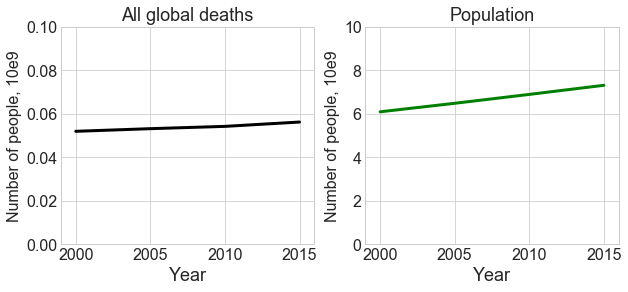

In [22]:
sns.set_style("whitegrid")
fig0 = plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
(data_sum_years['deaths_all_causes']/1000000).plot(lw=3, color = 'black')
plt.axis([1999, 2016, 0, 0.1])
plt.xlabel('Year', size = 18)
plt.ylabel('Number of people, 10e9', size = 16)
plt.title('All global deaths', fontsize = 18)
plt.tick_params(labelsize = 16)

plt.subplot(1, 2, 2)
(data_sum_years['population']/1000000).plot(lw=3, color = 'green')
plt.axis([1999, 2016, 0, 10])
plt.xlabel('Year', size = 18)
plt.ylabel('Number of people, 10e9', size = 16)
plt.title('Population', fontsize = 18)
    
plt.tick_params(labelsize = 16)
fig0.savefig('fig0', bbox_inches = 'tight')

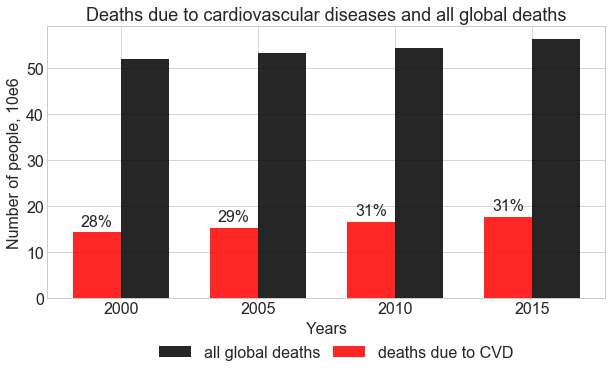

In [23]:
sns.set_style("whitegrid")
fig1, ax = plt.subplots(figsize = (10,5))

index = np.arange(4)
bar_width = 0.35


rects1 = ax.bar(index, data_sum_years['deaths_CVD']/1000, bar_width,
                alpha = 0.85, color='r',
                label='deaths due to CVD')

rects2 = ax.bar(index + bar_width, data_sum_years['deaths_all_causes']/1000, bar_width,
                alpha = 0.85, color='black',
                label='all global deaths')

for i, rect1 in enumerate(rects1):
    height = str(round(data_sum_years['deaths_CVD_%'].values[i])) + '%'
    ax.text(rect1.get_x() + rect1.get_width()/2., 1.05*rect1.get_height(), '%s' % height, ha='center', va='bottom', fontsize =16)

ax.set_xlabel('Years', fontsize =16)
ax.set_ylabel('Number of people, 10e6', fontsize =16)
ax.set_title('Deaths due to cardiovascular diseases and all global deaths', fontsize =18)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(data_sum_years.index)
ax.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, mode="expand", borderaxespad=0., fontsize =16)
plt.tick_params(labelsize = 16)

fig1.savefig('fig1', bbox_inches = 'tight')

In [23]:
data_percent_cardio = data.copy()
data_percent_cardio['deaths_CVD_2000_%'] = data_percent_cardio['cardio2000']/data_percent_cardio['all2000']*100 
data_percent_cardio['deaths_CVD_2005_%'] = data_percent_cardio['cardio2005']/data_percent_cardio['all2005']*100 
data_percent_cardio['deaths_CVD_2010_%'] = data_percent_cardio['cardio2010']/data_percent_cardio['all2010']*100 
data_percent_cardio['deaths_CVD_2015_%'] = data_percent_cardio['cardio2015']/data_percent_cardio['all2015']*100
del data_percent_cardio['cardio2000']
del data_percent_cardio['cardio2005']
del data_percent_cardio['cardio2010']
del data_percent_cardio['cardio2015']
del data_percent_cardio['all2000']
del data_percent_cardio['all2005']
del data_percent_cardio['all2010']
del data_percent_cardio['all2015']

In [24]:
data_percent_cardio.head()

,countries,population2000,population2005,population2010,population2015,deaths_CVD_2000_%,deaths_CVD_2005_%,deaths_CVD_2010_%,deaths_CVD_2015_%
0,Afghanistan,19702,24400,27962,32527,13.4281,16.4368,17.9592,21.1597
1,Albania,3122,3082,2902,2897,50.6032,55.3731,54.4706,53.6225
2,Algeria,31184,33268,36036,39667,33.0461,33.8635,34.0613,35.3691
3,Angola,15059,17913,21220,25022,7.17169,7.76024,8.50061,9.72082
4,Antigua and Barbuda,78,83,87,92,34.6055,36.4155,33.6232,33.3412


### Cholesterol

http://apps.who.int/gho/data/node.main.A887?lang=en  Raised total cholesterol (≥6.2 mmol/L). Data by country

### *Data Preparation and Cleaning - Part I - 2*

In [25]:
Cholesterol = pd.read_csv('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\heart\\Cholesterol6.csv', sep=',')
Cholesterol.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,"Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (age-standardized estimate)","Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (age-standardized estimate).1","Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (age-standardized estimate).2","Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (crude estimate)","Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (crude estimate).1","Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (crude estimate).2"
0,Country,Year,Age Group,Both sexes,Male,Female,Both sexes,Male,Female
1,Afghanistan,2008,25+ years,4.0 [1.7-8.1],3.5 [1.0-8.3],4.5 [1.2-11.6],3.6 [1.6-7.1],3.3 [0.9-7.7],4.0 [1.2-9.8]
2,Albania,2008,25+ years,12.0 [5.9-21.1],11.3 [4.2-23.5],12.6 [4.0-27.4],12.4 [6.0-21.8],11.5 [4.2-24.1],13.1 [4.2-28.5]
3,Algeria,2008,25+ years,8.6 [4.7-14.5],7.6 [3.3-14.4],9.6 [3.7-20.0],8.2 [4.6-13.5],7.3 [3.2-13.7],9.1 [3.7-18.5]
4,Andorra,2008,25+ years,25.5 [14.2-39.9],26.7 [11.3-48.5],24.1 [9.3-43.3],27.0 [15.0-42.3],27.1 [11.4-49.3],27.0 [10.0-47.9]


In [26]:
Cholesterol.shape

(194, 9)

In [27]:
del Cholesterol['Raised total cholesterol (&amp;#8805, 6.2 mmol/L) (crude estimate)']
Cholesterol.rename(columns=Cholesterol.iloc[0], inplace = True)
Cholesterol = Cholesterol[1:]

In [28]:
Cholesterol2008 = Cholesterol[['Country', ' Both sexes']]
Cholesterol2008.rename(columns = {' Both sexes': 'Raised total cholesterol 2008', 'Country': 'countries'}, inplace = True)
Cholesterol2008.head()

C:\Users\Olga\AppData\Local\conda\conda\envs\py36\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,countries,Raised total cholesterol 2008
1,Afghanistan,4.0 [1.7-8.1]
2,Albania,12.0 [5.9-21.1]
3,Algeria,8.6 [4.7-14.5]
4,Andorra,25.5 [14.2-39.9]
5,Angola,6.6 [2.4-14.6]


In [29]:
import re

In [30]:
def delete_brackets(text):
    return re.sub(r'\[[^()]*\]', '', text)    

In [31]:
Cholesterol2008 = Cholesterol2008.applymap(lambda x: delete_brackets(x))

Cholesterol2008.head()

,countries,Raised total cholesterol 2008
1,Afghanistan,4.0
2,Albania,12.0
3,Algeria,8.6
4,Andorra,25.5
5,Angola,6.6


In [32]:
Cholesterol2008.loc[Cholesterol2008['Raised total cholesterol 2008'] == '...']
Cholesterol2008.drop([112, 126, 148, 179], inplace = True)

In [33]:
Cholesterol2008['Raised total cholesterol 2008'] = pd.to_numeric(Cholesterol2008['Raised total cholesterol 2008'])

In [34]:
data = data_percent_cardio.merge(Cholesterol2008, on='countries', how='inner')
data.head()

,countries,population2000,population2005,population2010,population2015,deaths_CVD_2000_%,deaths_CVD_2005_%,deaths_CVD_2010_%,deaths_CVD_2015_%,Raised total cholesterol 2008
0,Afghanistan,19702,24400,27962,32527,13.4281,16.4368,17.9592,21.1597,4.0
1,Albania,3122,3082,2902,2897,50.6032,55.3731,54.4706,53.6225,12.0
2,Algeria,31184,33268,36036,39667,33.0461,33.8635,34.0613,35.3691,8.6
3,Angola,15059,17913,21220,25022,7.17169,7.76024,8.50061,9.72082,6.6
4,Antigua and Barbuda,78,83,87,92,34.6055,36.4155,33.6232,33.3412,11.1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 10 columns):
countries                        178 non-null object
population2000                   178 non-null object
population2005                   178 non-null object
population2010                   178 non-null object
population2015                   178 non-null object
deaths_CVD_2000_%                178 non-null object
deaths_CVD_2005_%                178 non-null object
deaths_CVD_2010_%                178 non-null object
deaths_CVD_2015_%                178 non-null object
Raised total cholesterol 2008    178 non-null float64
dtypes: float64(1), object(9)
memory usage: 15.3+ KB


### Blood pressure

http://apps.who.int/gho/data/node.main.A875STANDARD?lang=en 
Raised blood pressure (SBP ≥ 140 OR DBP ≥ 90), age-standardized (%). Estimates by country

### *Data Preparation and Cleaning - Part I - 3*

In [36]:
Blood_pressure = pd.read_csv('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\heart\\BloodPressure.csv', sep=',')
Blood_pressure.head()

,Unnamed: 0,2015,2015.1,2015.2,2014,2014.1,2014.2,2013,2013.1,2013.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,30.6 [23.6-38.3],30.4 [20.4-41.6],30.7 [21.2-41.3],30.6 [23.9-37.8],30.4 [21.0-41.0],30.6 [21.5-40.7],30.5 [24.1-37.3],30.4 [21.4-40.4],30.5 [21.9-40.0],...,23.9 [14.4-34.9],24.6 [17.3-32.9],25.4 [15.0-38.1],23.7 [13.8-35.2],24.4 [16.9-33.1],25.2 [14.5-38.5],23.4 [13.3-35.6],24.2 [16.4-33.3],25.1 [13.9-38.9],23.2 [12.7-35.9]
4,Albania,29.0 [22.4-36.2],33.0 [23.0-44.3],25.0 [16.8-34.7],29.2 [23.0-36.0],33.2 [23.9-43.7],25.3 [17.5-34.5],29.5 [23.6-35.8],33.3 [24.7-43.1],25.6 [18.3-34.1],...,30.9 [21.0-42.6],32.8 [24.9-41.3],34.4 [22.9-46.9],31.0 [20.5-43.6],33.0 [24.5-42.0],34.5 [22.4-47.7],31.1 [20.1-44.2],33.1 [24.2-42.6],34.6 [21.9-48.6],31.3 [19.7-45.1]


In [37]:
Blood_pressure.shape

(198, 124)

In [38]:
Blood_pressure.columns

Index(['Unnamed: 0', '2015', '2015.1', '2015.2', '2014', '2014.1', '2014.2',
       '2013', '2013.1', '2013.2',
       ...
       '1978.2', '1977', '1977.1', '1977.2', '1976', '1976.1', '1976.2',
       '1975', '1975.1', '1975.2'],
      dtype='object', length=124)

In [39]:
for c in Blood_pressure.columns:
    if (Blood_pressure[c].str.contains(" Male").any()):
        del Blood_pressure[c]
for c in Blood_pressure.columns: 
    if (Blood_pressure[c].str.contains(" Female").any()):
        del Blood_pressure[c]

In [40]:
Blood_pressure.head()

,Unnamed: 0,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,NaN,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes
3,Afghanistan,30.6 [23.6-38.3],30.6 [23.9-37.8],30.5 [24.1-37.3],30.5 [24.3-36.9],30.4 [24.5-36.6],30.4 [24.6-36.3],30.3 [24.6-36.0],30.2 [24.7-35.9],30.1 [24.7-35.6],...,26.2 [20.0-32.6],25.9 [19.7-32.6],25.7 [19.4-32.6],25.5 [19.0-32.6],25.3 [18.7-32.6],25.1 [18.2-32.7],24.8 [17.8-32.8],24.6 [17.3-32.9],24.4 [16.9-33.1],24.2 [16.4-33.3]
4,Albania,29.0 [22.4-36.2],29.2 [23.0-36.0],29.5 [23.6-35.8],29.7 [24.1-35.6],29.9 [24.6-35.4],30.1 [25.0-35.4],30.2 [25.4-35.4],30.4 [25.6-35.5],30.5 [25.8-35.4],...,32.1 [26.0-38.4],32.2 [25.9-38.6],32.3 [25.8-39.0],32.4 [25.6-39.3],32.5 [25.4-39.8],32.6 [25.3-40.2],32.7 [25.1-40.7],32.8 [24.9-41.3],33.0 [24.5-42.0],33.1 [24.2-42.6]


In [41]:
Blood_pressure.rename(columns={'Unnamed: 0': 'countries'}, inplace = True)
Blood_pressure.head()

,countries,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
0,NaN,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...,Raised blood pressure (SBP&gt;=140 OR DBP&gt;...
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,...,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes,Both sexes
3,Afghanistan,30.6 [23.6-38.3],30.6 [23.9-37.8],30.5 [24.1-37.3],30.5 [24.3-36.9],30.4 [24.5-36.6],30.4 [24.6-36.3],30.3 [24.6-36.0],30.2 [24.7-35.9],30.1 [24.7-35.6],...,26.2 [20.0-32.6],25.9 [19.7-32.6],25.7 [19.4-32.6],25.5 [19.0-32.6],25.3 [18.7-32.6],25.1 [18.2-32.7],24.8 [17.8-32.8],24.6 [17.3-32.9],24.4 [16.9-33.1],24.2 [16.4-33.3]
4,Albania,29.0 [22.4-36.2],29.2 [23.0-36.0],29.5 [23.6-35.8],29.7 [24.1-35.6],29.9 [24.6-35.4],30.1 [25.0-35.4],30.2 [25.4-35.4],30.4 [25.6-35.5],30.5 [25.8-35.4],...,32.1 [26.0-38.4],32.2 [25.9-38.6],32.3 [25.8-39.0],32.4 [25.6-39.3],32.5 [25.4-39.8],32.6 [25.3-40.2],32.7 [25.1-40.7],32.8 [24.9-41.3],33.0 [24.5-42.0],33.1 [24.2-42.6]


In [42]:
Blood_pressure.drop([0,1,2], inplace = True)
Blood_pressure.head()

,countries,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
3,Afghanistan,30.6 [23.6-38.3],30.6 [23.9-37.8],30.5 [24.1-37.3],30.5 [24.3-36.9],30.4 [24.5-36.6],30.4 [24.6-36.3],30.3 [24.6-36.0],30.2 [24.7-35.9],30.1 [24.7-35.6],...,26.2 [20.0-32.6],25.9 [19.7-32.6],25.7 [19.4-32.6],25.5 [19.0-32.6],25.3 [18.7-32.6],25.1 [18.2-32.7],24.8 [17.8-32.8],24.6 [17.3-32.9],24.4 [16.9-33.1],24.2 [16.4-33.3]
4,Albania,29.0 [22.4-36.2],29.2 [23.0-36.0],29.5 [23.6-35.8],29.7 [24.1-35.6],29.9 [24.6-35.4],30.1 [25.0-35.4],30.2 [25.4-35.4],30.4 [25.6-35.5],30.5 [25.8-35.4],...,32.1 [26.0-38.4],32.2 [25.9-38.6],32.3 [25.8-39.0],32.4 [25.6-39.3],32.5 [25.4-39.8],32.6 [25.3-40.2],32.7 [25.1-40.7],32.8 [24.9-41.3],33.0 [24.5-42.0],33.1 [24.2-42.6]
5,Algeria,25.1 [19.4-31.5],25.4 [20.0-31.5],25.8 [20.6-31.5],26.2 [21.2-31.5],26.5 [21.8-31.6],26.9 [22.3-31.8],27.2 [22.8-32.0],27.6 [23.2-32.2],27.9 [23.6-32.5],...,31.7 [25.6-38.0],31.6 [25.5-38.1],31.6 [25.1-38.3],31.5 [24.8-38.5],31.5 [24.5-38.8],31.5 [24.1-39.2],31.5 [23.8-39.5],31.5 [23.4-40.0],31.5 [22.9-40.6],31.5 [22.5-41.2]
6,Andorra,18.7 [13.3-24.8],19.2 [14.0-24.9],19.6 [14.6-25.1],20.1 [15.3-25.4],20.6 [16.0-25.7],21.1 [16.6-26.0],21.7 [17.3-26.4],22.2 [17.9-26.9],22.8 [18.5-27.4],...,35.7 [29.7-41.9],36.1 [30.0-42.5],36.5 [30.2-43.0],36.8 [30.4-43.6],37.1 [30.5-44.1],37.4 [30.4-44.7],37.6 [30.2-45.4],37.7 [29.9-46.0],37.9 [29.5-46.6],37.9 [29.1-47.1]
7,Angola,29.7 [22.1-38.3],29.8 [22.6-38.0],30.0 [22.9-37.7],30.1 [23.4-37.5],30.2 [23.7-37.4],30.4 [24.0-37.3],30.5 [24.2-37.2],30.6 [24.4-37.3],30.6 [24.5-37.2],...,28.9 [21.9-36.5],28.7 [21.6-36.4],28.5 [21.3-36.3],28.3 [21.0-36.4],28.1 [20.6-36.4],27.9 [20.2-36.4],27.7 [19.7-36.5],27.5 [19.2-36.7],27.2 [18.7-37.0],27.0 [18.2-37.3]


In [43]:
Blood_pressure = Blood_pressure.applymap(lambda x: delete_brackets(x))
Blood_pressure.tail()

,countries,2015,2014,2013,2012,2011,2010,2009,2008,2007,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
193,Venezuela (Bolivarian Republic of),18.6,19.0,19.4,19.8,20.2,20.6,21.0,21.5,21.9,...,32.8,33.1,33.4,33.6,33.8,33.9,34.1,34.2,34.4,34.5
194,Viet Nam,23.4,23.4,23.3,23.2,23.2,23.1,23.0,22.9,22.9,...,20.6,20.6,20.5,20.5,20.5,20.4,20.4,20.4,20.3,20.3
195,Yemen,30.7,30.7,30.7,30.6,30.6,30.6,30.5,30.5,30.5,...,27.4,27.2,26.9,26.7,26.5,26.4,26.2,26.1,25.9,25.8
196,Zambia,27.1,27.2,27.3,27.3,27.4,27.5,27.5,27.6,27.7,...,29.3,29.4,29.4,29.4,29.4,29.3,29.2,29.0,28.9,28.7
197,Zimbabwe,28.2,28.3,28.4,28.5,28.6,28.7,28.7,28.8,28.9,...,29.2,29.1,29.0,28.9,28.7,28.6,28.4,28.2,28.0,27.8


In [44]:
def clean_numbers(text): 
    return re.sub("\D", "", text) 

In [45]:
Blood_pressure2000_2015 = Blood_pressure[['2015', '2010', '2005', '2000']]
Blood_pressure2000_2015 = Blood_pressure2000_2015.applymap(lambda x: clean_numbers(x))
Blood_pressure2000_2015.head()

,2015,2010,2005,2000
3,306,304,299,291
4,290,301,308,312
5,251,269,286,300
6,187,211,239,267
7,297,304,307,307


In [46]:
for c in Blood_pressure2000_2015.columns:
    Blood_pressure2000_2015[c] = pd.to_numeric(Blood_pressure2000_2015[c])
    Blood_pressure2000_2015[c] = Blood_pressure2000_2015[c]/10
Blood_pressure2000_2015['countries'] = Blood_pressure['countries']
Blood_pressure2000_2015.head()

,2015,2010,2005,2000,countries
3,30.6,30.4,29.9,29.1,Afghanistan
4,29.0,30.1,30.8,31.2,Albania
5,25.1,26.9,28.6,30.0,Algeria
6,18.7,21.1,23.9,26.7,Andorra
7,29.7,30.4,30.7,30.7,Angola


In [47]:
data = data.merge(Blood_pressure2000_2015, on='countries', how='inner')
data.rename(columns = {'2015': 'Raised blood pressure 2015', 
                       '2010': 'Raised blood pressure 2010', 
                       '2005': 'Raised blood pressure 2005', 
                      '2000': 'Raised blood pressure 2000'}, inplace = True)
data.head()

,countries,population2000,population2005,population2010,population2015,deaths_CVD_2000_%,deaths_CVD_2005_%,deaths_CVD_2010_%,deaths_CVD_2015_%,Raised total cholesterol 2008,Raised blood pressure 2015,Raised blood pressure 2010,Raised blood pressure 2005,Raised blood pressure 2000
0,Afghanistan,19702,24400,27962,32527,13.4281,16.4368,17.9592,21.1597,4.0,30.6,30.4,29.9,29.1
1,Albania,3122,3082,2902,2897,50.6032,55.3731,54.4706,53.6225,12.0,29.0,30.1,30.8,31.2
2,Algeria,31184,33268,36036,39667,33.0461,33.8635,34.0613,35.3691,8.6,25.1,26.9,28.6,30.0
3,Angola,15059,17913,21220,25022,7.17169,7.76024,8.50061,9.72082,6.6,29.7,30.4,30.7,30.7
4,Antigua and Barbuda,78,83,87,92,34.6055,36.4155,33.6232,33.3412,11.1,23.4,22.9,22.8,23.1


In [64]:
data['deaths_CVD_2000_%'] = pd.to_numeric(data['deaths_CVD_2000_%'])
data['deaths_CVD_2005_%'] = pd.to_numeric(data['deaths_CVD_2005_%'])
data['deaths_CVD_2010_%'] = pd.to_numeric(data['deaths_CVD_2010_%'])
data['deaths_CVD_2015_%'] = pd.to_numeric(data['deaths_CVD_2015_%'])

### *Findings - Part I - 2*

In [65]:
correlation = data.corr()
correlation

,deaths_CVD_2000_%,deaths_CVD_2005_%,deaths_CVD_2010_%,deaths_CVD_2015_%,Raised total cholesterol 2008,Raised blood pressure 2015,Raised blood pressure 2010,Raised blood pressure 2005,Raised blood pressure 2000
deaths_CVD_2000_%,1.000000,0.982884,0.959266,0.922854,0.661859,-0.226977,-0.155737,-0.037148,0.120877
deaths_CVD_2005_%,0.982884,1.000000,0.987547,0.958494,0.595760,-0.185131,-0.123160,-0.017837,0.124949
deaths_CVD_2010_%,0.959266,0.987547,1.000000,0.971850,0.535489,-0.133603,-0.080383,0.012380,0.139854
deaths_CVD_2015_%,0.922854,0.958494,0.971850,1.000000,0.470593,-0.094018,-0.049341,0.029564,0.139607
Raised total cholesterol 2008,0.661859,0.595760,0.535489,0.470593,1.000000,-0.465727,-0.355356,-0.188494,0.018893
Raised blood pressure 2015,-0.226977,-0.185131,-0.133603,-0.094018,-0.465727,1.000000,0.976582,0.889546,0.734140
Raised blood pressure 2010,-0.155737,-0.123160,-0.080383,-0.049341,-0.355356,0.976582,1.000000,0.966337,0.858132
Raised blood pressure 2005,-0.037148,-0.017837,0.012380,0.029564,-0.188494,0.889546,0.966337,1.000000,0.959343
Raised blood pressure 2000,0.120877,0.124949,0.139854,0.139607,0.018893,0.734140,0.858132,0.959343,1.000000


In [67]:
corr_table = [correlation.loc['Raised blood pressure 2000', 'deaths_CVD_2000_%'],
              correlation.loc['Raised blood pressure 2005', 'deaths_CVD_2005_%'],
              correlation.loc['Raised blood pressure 2010', 'deaths_CVD_2010_%'],
              correlation.loc['Raised blood pressure 2015', 'deaths_CVD_2015_%']]

corr_table

[0.12087711815826553,
 -0.017836763395666973,
 -0.08038301343500187,
 -0.09401785294434403]

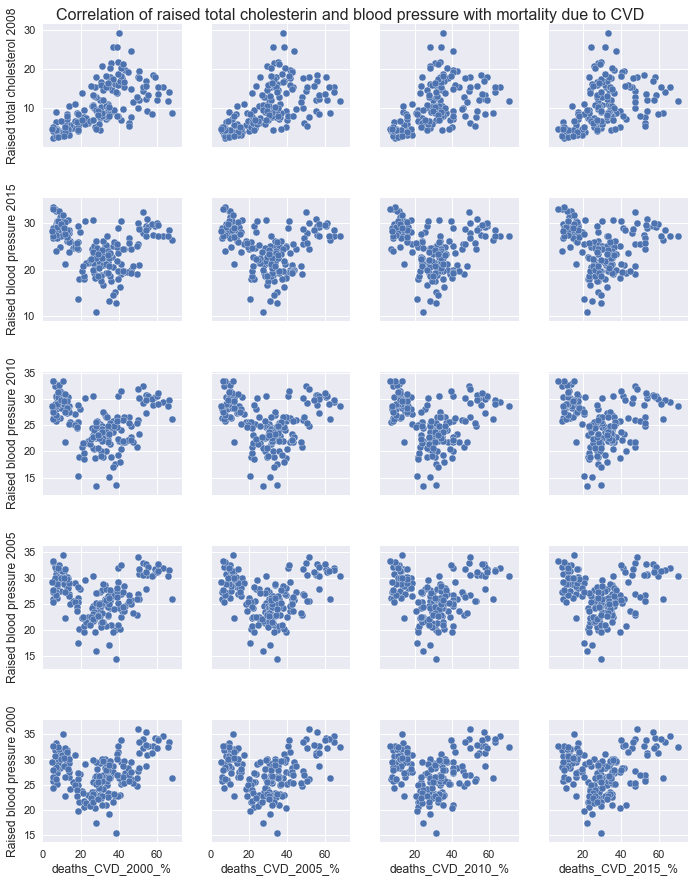

In [204]:
sns.set(font_scale=1.1)
fig2 = sns.pairplot(data, x_vars=['deaths_CVD_2000_%', 'deaths_CVD_2005_%', 'deaths_CVD_2010_%', 'deaths_CVD_2015_%'], 
                         y_vars=['Raised total cholesterol 2008', 'Raised blood pressure 2015', 'Raised blood pressure 2010', 
                                 'Raised blood pressure 2005', 'Raised blood pressure 2000'])
plt.suptitle('Correlation of raised total cholesterin and blood pressure with mortality due to CVD', fontsize = 16)
fig2.savefig('fig2', bbox_inches = 'tight')

### *Findings - Part I -3*

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [76]:
data1 = data.copy()

In [77]:
data1.isnull().any()

countries                        False
population2000                   False
population2005                   False
population2010                   False
population2015                   False
deaths_CVD_2000_%                False
deaths_CVD_2005_%                False
deaths_CVD_2010_%                False
deaths_CVD_2015_%                False
Raised total cholesterol 2008    False
Raised blood pressure 2015        True
Raised blood pressure 2010        True
Raised blood pressure 2005        True
Raised blood pressure 2000        True
dtype: bool

In [78]:
data1.dropna(inplace = True)

In [79]:
data1.isnull().any()

countries                        False
population2000                   False
population2005                   False
population2010                   False
population2015                   False
deaths_CVD_2000_%                False
deaths_CVD_2005_%                False
deaths_CVD_2010_%                False
deaths_CVD_2015_%                False
Raised total cholesterol 2008    False
Raised blood pressure 2015       False
Raised blood pressure 2010       False
Raised blood pressure 2005       False
Raised blood pressure 2000       False
dtype: bool

In [80]:
data1.shape

(177, 14)

In [81]:
data1.rename(index = data1['countries'], inplace = True)
del data1['countries']
data1.head()

,population2000,population2005,population2010,population2015,deaths_CVD_2000_%,deaths_CVD_2005_%,deaths_CVD_2010_%,deaths_CVD_2015_%,Raised total cholesterol 2008,Raised blood pressure 2015,Raised blood pressure 2010,Raised blood pressure 2005,Raised blood pressure 2000
Afghanistan,19702,24400,27962,32527,13.428143,16.436778,17.959238,21.159741,4.0,30.6,30.4,29.9,29.1
Albania,3122,3082,2902,2897,50.603197,55.373068,54.470636,53.622469,12.0,29.0,30.1,30.8,31.2
Algeria,31184,33268,36036,39667,33.046056,33.863472,34.061338,35.369107,8.6,25.1,26.9,28.6,30.0
Angola,15059,17913,21220,25022,7.171688,7.760237,8.500609,9.720823,6.6,29.7,30.4,30.7,30.7
Antigua and Barbuda,78,83,87,92,34.605471,36.415454,33.623195,33.341241,11.1,23.4,22.9,22.8,23.1


### Prediction of mortality due to CVD in 2010 depending on percentage of people with raised blood pressure and raised total cholesterol using linear regression

In [297]:
X = data1[['Raised blood pressure 2010', 'Raised total cholesterol 2008']]

In [298]:
y = data1['deaths_CVD_2010_%']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [300]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
y_prediction = regressor1.predict(X_test)
y_prediction

array([29.67782929, 37.45946249, 24.00168163, 20.48622191, 42.39387652,
       26.85821133, 39.68028344, 41.46813487, 23.91876788, 25.40245541,
       36.25682773, 25.23662792, 29.58582528, 42.08051221, 33.9487131 ,
       26.11198763, 19.14525074, 26.24517318, 27.6966593 , 26.16247971,
       27.16708557, 25.82600426, 23.11252132, 30.97706826, 36.26613827,
       25.67890798, 22.78995661, 23.66991652, 39.357939  , 24.59609871,
       25.5774833 , 31.22120929, 23.14001238, 21.57801132, 22.7574248 ,
       20.42630917, 27.38789519, 22.41667956, 40.81829512, 37.00327169,
       23.49915843, 25.15809411, 22.01591144, 22.4719921 , 29.43357812,
       46.19520948, 40.88729813, 23.84954461, 33.34531589, 24.48996369,
       29.65942849, 21.48096657, 31.89393991, 26.3743092 , 36.48727829,
       22.62850905, 38.860016  , 29.2538399 , 32.87970443])

In [302]:
y_test

Saint Lucia                              33.686022
Bahrain                                  30.683816
Malawi                                    7.883203
Nigeria                                   8.474171
Austria                                  42.786440
Bhutan                                   25.529955
Kuwait                                   41.808753
Croatia                                  48.958651
Eritrea                                  16.051473
Chad                                      8.091067
Brunei Darussalam                        32.106465
Niger                                     9.144352
Yemen                                    32.818790
Netherlands                              28.323574
Micronesia (Federated States of)         31.796013
Mali                                     10.538545
Democratic People's Republic of Korea    39.718613
Venezuela (Bolivarian Republic of)       29.935618
Turkmenistan                             46.901109
Congo                          

In [303]:
X_test.index

Index(['Saint Lucia', 'Bahrain', 'Malawi', 'Nigeria', 'Austria', 'Bhutan',
       'Kuwait', 'Croatia', 'Eritrea', 'Chad', 'Brunei Darussalam', 'Niger',
       'Yemen', 'Netherlands', 'Micronesia (Federated States of)', 'Mali',
       'Democratic People's Republic of Korea',
       'Venezuela (Bolivarian Republic of)', 'Turkmenistan', 'Congo',
       'Mauritania', 'Samoa', 'Togo', 'Armenia', 'Bahamas', 'Burkina Faso',
       'Burundi', 'United Republic of Tanzania', 'Serbia', 'Gambia', 'Senegal',
       'Barbados', 'Bangladesh', 'Guatemala', 'China', 'Ghana', 'Vanuatu',
       'Haiti', 'Portugal', 'Spain', 'Bolivia (Plurinational State of)',
       'Timor-Leste', 'Sao Tome and Principe', 'Cameroon',
       'Trinidad and Tobago', 'Hungary', 'United Arab Emirates', 'Uzbekistan',
       'Equatorial Guinea', 'Cambodia', 'Morocco', 'Republic of Korea', 'Iraq',
       'Grenada', 'Thailand', 'Jamaica', 'Cyprus', 'Uruguay', 'Mexico'],
      dtype='object')

In [304]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

10.686786364853736


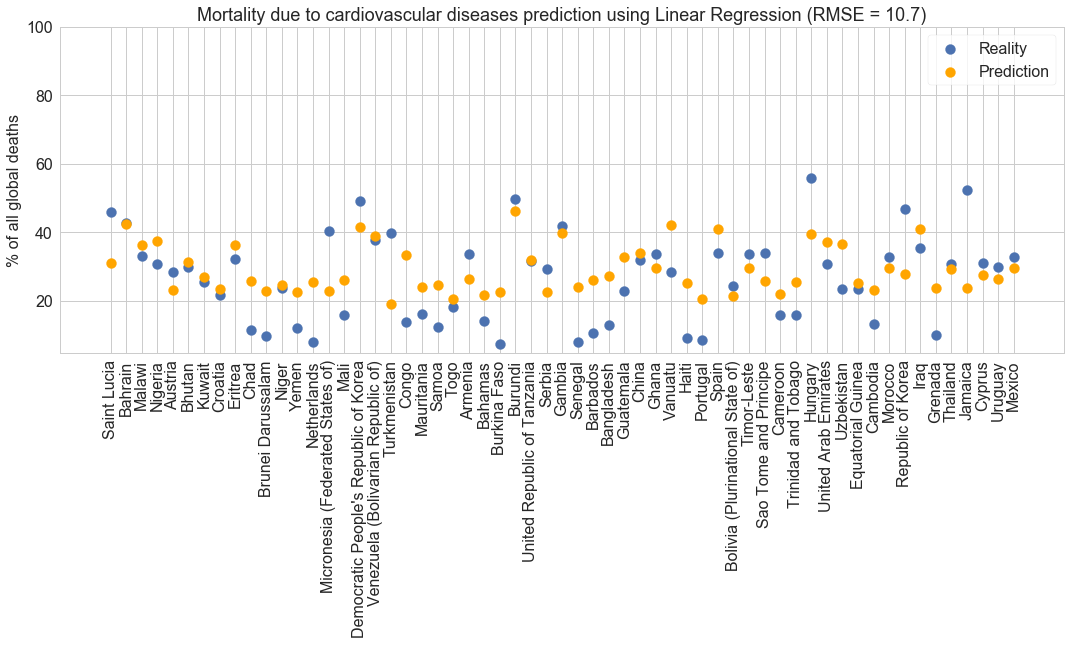

In [305]:
sns.set_style("whitegrid")
fig1_2, ax = plt.subplots(figsize=(18, 6))

ax.scatter(X_test.index, y_test, label = 'Reality', s = 100)
ax.scatter(X_test.index, y_prediction, label = 'Prediction', s = 100, c = 'orange')

ax.set_title('Mortality due to cardiovascular diseases prediction using Linear Regression (RMSE = 10.7)', size =18)
ax.set_xticklabels(X_test.index, rotation = 'vertical', fontsize =16)
ax.set_ylabel('% of all global deaths', size =16)

ax.legend(fontsize =16, frameon = True, facecolor = 'white')
plt.tick_params(labelsize = 16)
ax.set_ylim(top = 100)

plt.show()
fig1_2.savefig('fig1_2', bbox_inches = 'tight')

In [306]:
y_test.describe()

count    59.000000
mean     26.744728
std      12.740387
min       7.304141
25%      14.918478
50%      29.369281
75%      33.722763
max      55.925850
Name: deaths_CVD_2010_%, dtype: float64

### Prediction using Decision Tree Regressor

In [307]:
regressor2 = DecisionTreeRegressor(max_depth=100)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [308]:
y_prediction = regressor2.predict(X_test)
y_prediction

array([36.09703025, 33.88870064, 12.62777865, 38.31092546, 37.19007263,
       27.23657715, 45.31326048, 57.55403092,  7.48527149, 12.21137985,
       35.00264993, 10.87922152, 11.94936827, 40.31895426, 36.2155165 ,
       17.95923816, 39.09580736, 21.57317677, 52.61774448, 49.84305125,
       17.95923816, 52.61774448, 11.7357726 , 45.31326048, 27.32939234,
       12.21137985, 11.7357726 , 14.9089725 , 57.55403092, 17.95923816,
       17.95923816, 35.96866142, 23.93441422, 23.93349326, 39.09580736,
       38.31092546, 33.9410438 , 38.31092546, 36.09703025, 43.91274209,
       21.57317677,  8.39604112, 11.7357726 ,  9.00885344, 35.96866142,
       39.31341937, 33.44875641, 23.93441422, 70.74088217, 23.93441422,
       57.91477291, 20.89107361, 36.09703025, 33.93894714, 27.32939234,
       31.36546626, 40.31895426, 32.20579995, 46.66596609])

In [309]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

13.58534043507599


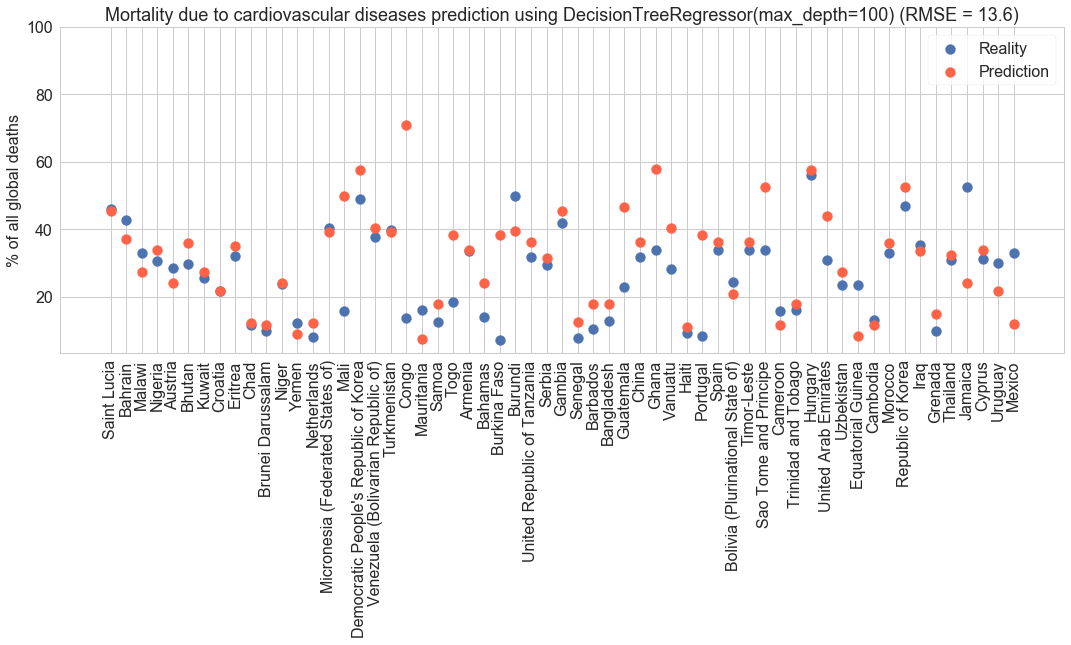

In [311]:
sns.set_style("whitegrid")
fig1_3, ax = plt.subplots(figsize=(18, 6))

ax.scatter(X_test.index, y_test, label = 'Reality', s = 100)
ax.scatter(X_test.index, y_prediction, label = 'Prediction', s = 100, c = 'tomato')

ax.set_title('Mortality due to cardiovascular diseases prediction using DecisionTreeRegressor(max_depth=100) (RMSE = 13.6)', size =18)
ax.set_xticklabels(X_test.index, rotation = 'vertical', fontsize =16)
ax.set_ylabel('% of all global deaths', size =16)

ax.legend(fontsize =16, frameon = True, facecolor = 'white')
plt.tick_params(labelsize = 16)
ax.set_ylim(top = 100)

plt.show()
fig1_3.savefig('fig1_3', bbox_inches = 'tight')

RMSE is very high => these data are not enough for prediction.

## Part II. Cardiovascular disease presence prediction for a given patient.

https://www.kaggle.com/danimal/heartdiseaseensembleclassifier

In [2]:
heart_disease = pd.read_csv('C:\\Users\\Olga\\edx_Python_for_Data_science\\FinalProject\\datasets\\heart\\heart_disease_ensemble_classifier\\Heart_Disease_Data.csv', sep=',', na_values="?")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


| **Attributes:** |
|---|
| **age** | (age in years) |
|**sex**| (1 = male, 0 = female)|
|**cp**| (chest pain type: 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |	
|**trestbps**| (resting blood pressure (in mm Hg on admission to the hospital))|
|**chol**| (serum cholesterol in mg/dl)|
|**fbs**| (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|**restecg**| (resting electrocardiographic results: 0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria| 
|**thalach**| (maximum heart rate achieved)|
|**exang**| (exercise induced angina: 1 = yes, 0 = no)|	
|**oldpeak**| (ST depression induced by exercise relative to rest)|
|**slope**| (the slope of the peak exercise ST segment: 1 = upsloping, 2 = flat, 3 = downsloping|	
|**ca**| (number of major vessels (0-3) colored by fluoroscopy)|
|**thal**| (3 = normal, 6 = fixed defect, 7 = reversable defect)|	
|**pred_attribute** |(the predicted attribute: diagnosis of heart disease (angiographic disease status): 0 = < 50% diameter narrowing (Healthy), 1 = > 50% diameter narrowing (Sick))|

In [4]:
heart_disease.shape

(303, 14)

### *Data Preparation and Cleaning - Part II*

In [5]:
heart_disease.dropna(inplace=True)

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age               297 non-null int64
sex               297 non-null int64
cp                297 non-null int64
trestbps          297 non-null int64
chol              297 non-null int64
fbs               297 non-null int64
restecg           297 non-null int64
thalach           297 non-null int64
exang             297 non-null int64
oldpeak           297 non-null float64
slop              297 non-null int64
ca                297 non-null float64
thal              297 non-null float64
pred_attribute    297 non-null int64
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [7]:
heart_disease.isnull().any()

age               False
sex               False
cp                False
trestbps          False
chol              False
fbs               False
restecg           False
thalach           False
exang             False
oldpeak           False
slop              False
ca                False
thal              False
pred_attribute    False
dtype: bool

In [8]:
heart_disease.rename(columns = {'slop': 'slope'}, inplace = True)

In [9]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_attribute
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [10]:
heart_disease = heart_disease[heart_disease['pred_attribute'] <= 1]

In [11]:
heart_disease.shape

(214, 14)

### *Findings - Part II - 1*

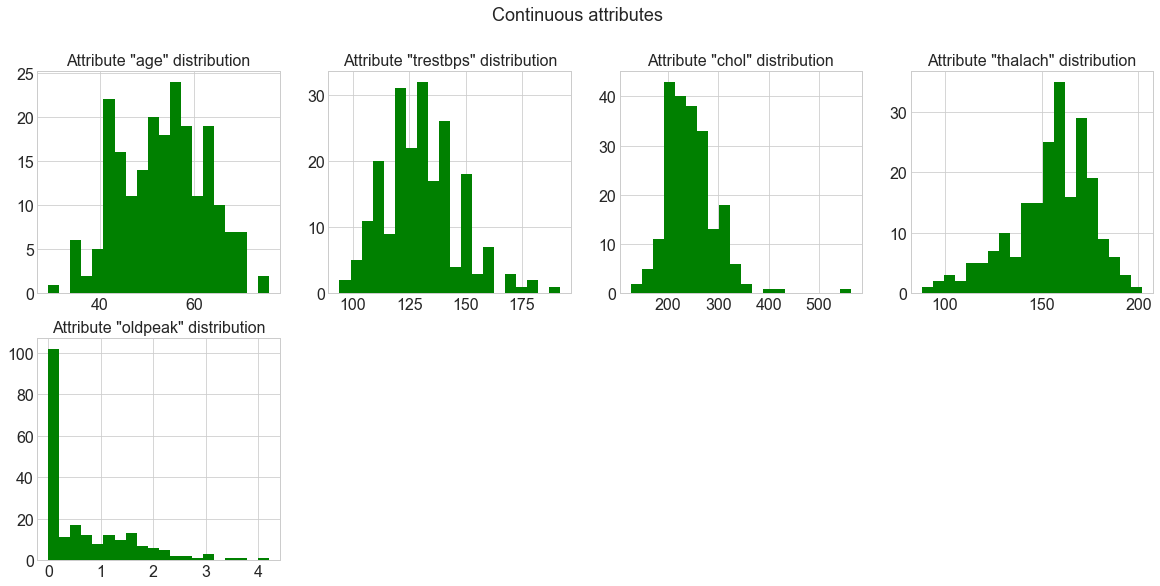

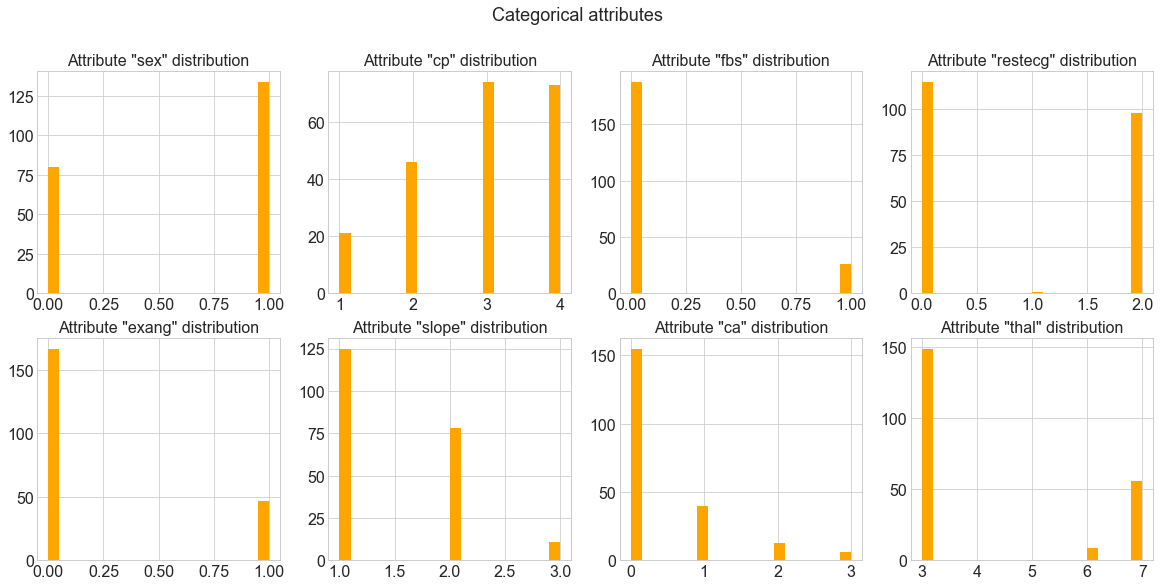

In [12]:
sns.set_style('whitegrid')
fig3=plt.figure(figsize=(20,9))
for i, feature in enumerate(heart_disease.columns[[0, 3, 4, 7, 9]]):
    ax=fig3.add_subplot(2, 4, i+1)
    heart_disease[feature].hist(bins=20, ax=ax, facecolor='green')
    ax.set_title('Attribute "' + feature + '" distribution', fontsize = 16)
    plt.tick_params(labelsize = 16)

fig3.suptitle('Continuous attributes', fontsize = 18)
fig3.savefig('fig3', bbox_inches = 'tight')

fig4=plt.figure(figsize=(20,9))
for i, feature in enumerate(heart_disease.columns[[1, 2, 5, 6, 8, 10, 11, 12]]):
    ax=fig4.add_subplot(2, 4, i+1)
    heart_disease[feature].hist(bins=20, ax=ax, facecolor='orange')
    ax.set_title('Attribute "' + feature + '" distribution', fontsize = 16)
    plt.tick_params(labelsize = 16)
        
fig4.suptitle('Categorical attributes', fontsize = 18)
fig4.savefig('fig4', bbox_inches = 'tight')
plt.show()

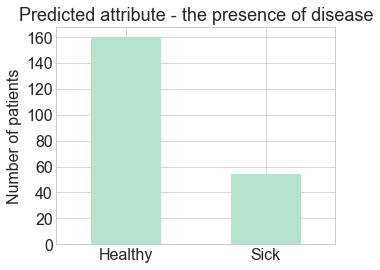

In [13]:
qq = heart_disease['pred_attribute'].copy()
qq[qq==0] = 'Healthy'
qq[qq==1] = 'Sick'
fig5 = plt.figure(figsize = (5,4))
qq.value_counts().plot(kind = 'bar',  colormap = 'Pastel2', fontsize = 16)
plt.ylabel('Number of patients', size = 16)
plt.xticks([0,1], ['Healthy', 'Sick'], rotation='horizontal')
plt.title('Predicted attribute - the presence of disease', fontsize = 18)

fig5.savefig('fig5', bbox_inches = 'tight')

In [14]:
qq.value_counts()

Healthy    160
Sick        54
Name: pred_attribute, dtype: int64

In [222]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_attribute
count,214.000000,214.000000,214.000000,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,53.392523,0.626168,2.929907,130.21028,244.920561,0.121495,0.920561,155.401869,0.219626,0.705607,1.467290,0.392523,4.172897,0.252336
std,9.233799,0.484954,0.973712,16.90314,50.835815,0.327468,0.996825,20.809604,0.414964,0.861850,0.594462,0.728456,1.790170,0.435372
min,29.000000,0.000000,1.000000,94.00000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,46.000000,0.000000,2.000000,120.00000,211.000000,0.000000,0.000000,144.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,3.000000,130.00000,240.000000,0.000000,0.000000,159.000000,0.000000,0.400000,1.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.00000,269.750000,0.000000,2.000000,170.750000,0.000000,1.200000,2.000000,1.000000,7.000000,0.750000
max,76.000000,1.000000,4.000000,192.00000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


In [223]:
heart_disease.columns[[0, 3, 4, 7, 9]]

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

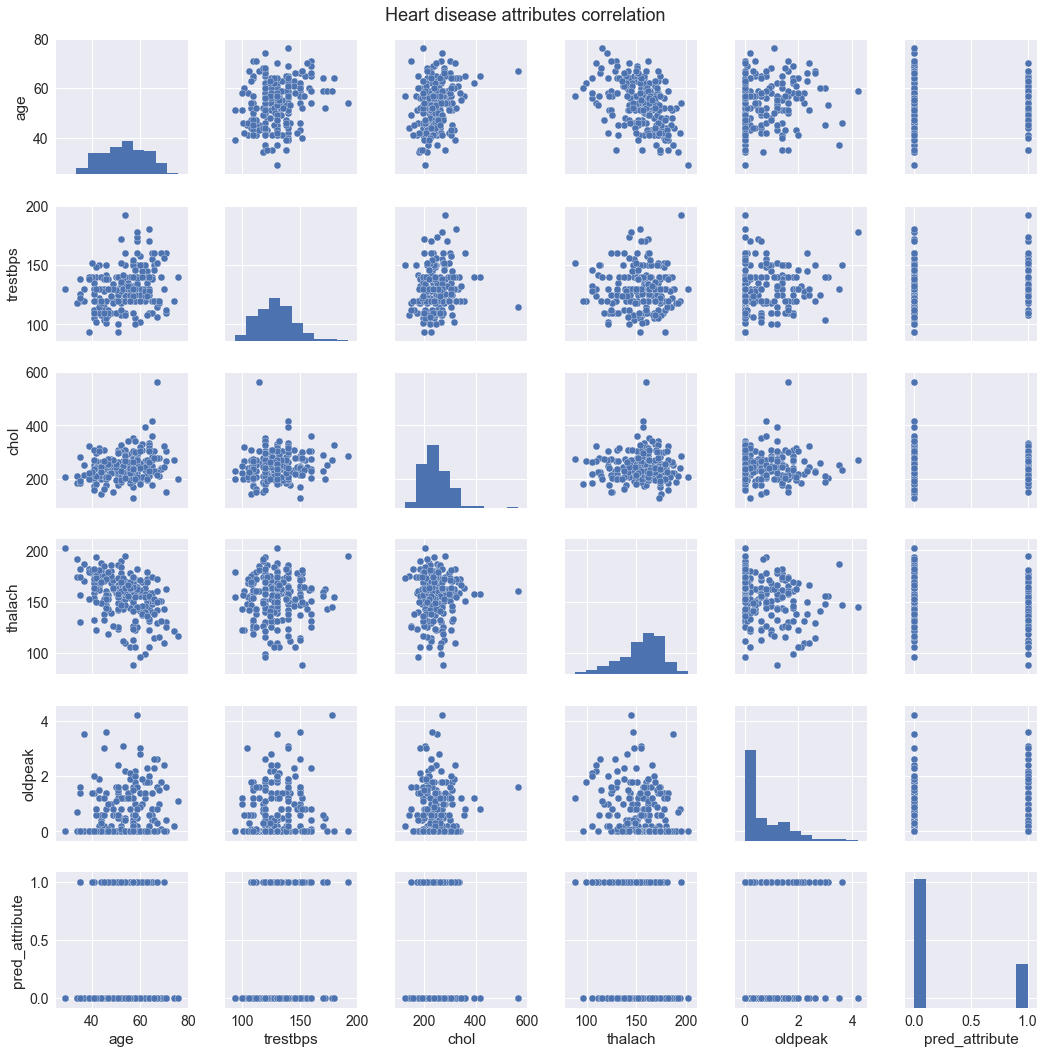

In [224]:
sns.set(font_scale=1.4)
fig6 = sns.pairplot(heart_disease[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'pred_attribute']])
plt.subplots_adjust(top=0.95)
plt.suptitle('Heart disease attributes correlation', fontsize = 18)
plt.show()

fig6.savefig('fig6', bbox_inches = 'tight')

### *Findings - Part II - 2*

### Classification

In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import accuracy_score

In [226]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'pred_attribute'],
      dtype='object')

In [227]:
X = heart_disease[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = heart_disease['pred_attribute']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 324)

In [232]:
def Classification(classifier):
    classifier.fit(X_train, y_train)
    return classifier.predict(X_test)

In [233]:
y_pred1 = Classification(DecisionTreeClassifier(max_leaf_nodes=50, random_state=0))
y_pred2 = Classification(SGDClassifier(max_iter = 10000)) #Stochastic Gradient Descent Classifier
y_pred3 = Classification(svm.SVC()) #Support Vector Classification

**Accuracy**: the fraction of correct predictions (true positive + true negative / all)

In [234]:
A1 = accuracy_score(y_test, y_pred1)
A2 = accuracy_score(y_test, y_pred2)
A3 = accuracy_score(y_test, y_pred3)
print(A1, A2, A3)

0.7464788732394366 0.7887323943661971 0.7887323943661971


In [256]:
round(A1,2)

0.75

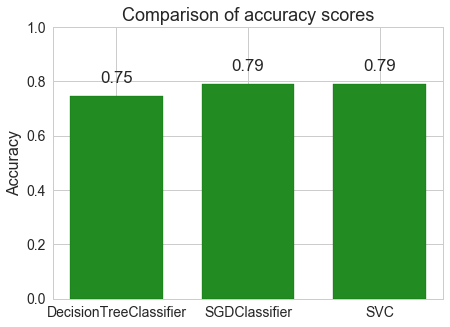

In [263]:
acc = [A1, A2, A3]
names = ['DecisionTreeClassifier', 'SGDClassifier', 'SVC'] 

sns.set_style('whitegrid')
fig_acc, ax = plt.subplots(figsize = (7,5))
plt.ylabel('Accuracy', fontsize = 16)
ax.set_ylim(top = 1)
plt.title('Comparison of accuracy scores', fontsize = 18)

rects = ax.bar(names, acc, width = 0.7, color = 'forestgreen', edgecolor = 'darkgreen')

for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' % height,
                ha='center', va='bottom')

plt.show()
fig_acc.savefig('fig_acc', bbox_inches = 'tight')

**Confusion matrix**: columns(0,1) -  number of real values y_test, rows(0,1) - number of predicted values y_pred

In [264]:
matrix1 = metrics.confusion_matrix(y_test, y_pred1)
matrix2 = metrics.confusion_matrix(y_test, y_pred2) 
matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cm1=pd.DataFrame(data=matrix1, columns=['Predicted:0','Predicted:1'],index=['Real:0','Real:1'])
cm2=pd.DataFrame(data=matrix2, columns=['Predicted:0','Predicted:1'],index=['Real:0','Real:1'])
cm3=pd.DataFrame(data=matrix3, columns=['Predicted:0','Predicted:1'],index=['Real:0','Real:1'])

[[47  9]
 [ 9  6]] 
 [[53  3]
 [12  3]] 
 [[56  0]
 [15  0]]


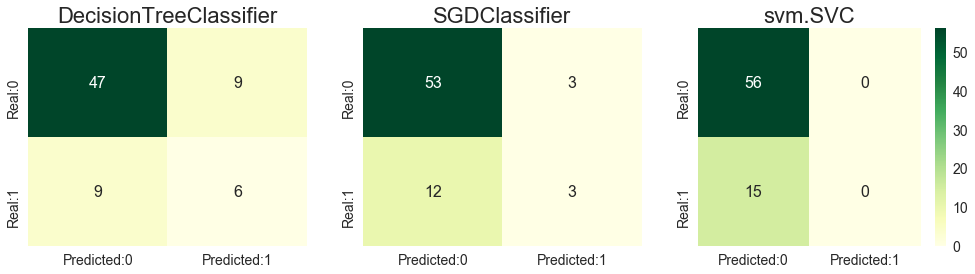

In [265]:
fig7 = plt.figure(figsize = (17,4))
sns.set(font_scale=1.4)

plt.subplot(1,3,1)
plt.title('DecisionTreeClassifier', fontsize = 22)
sns.heatmap(cm1, annot=True, fmt='d',cmap="YlGn", annot_kws={"size": 16}, cbar=False)

plt.subplot(1,3,2)
plt.title('SGDClassifier', fontsize = 22)
sns.heatmap(cm2, annot=True, fmt='d', cmap="YlGn", annot_kws={"size": 16}, cbar=False)

plt.subplot(1,3,3)
plt.title('svm.SVC', fontsize = 22)
sns.heatmap(cm3, annot=True, fmt='d', cmap="YlGn", annot_kws={"size": 16})
print (matrix1, '\n', matrix2, '\n', matrix3)

fig7.savefig('fig7', bbox_inches = 'tight')

DecisionTreeClassifier:

True Positives: 6

True Negatives: 47

False Positives: 9 (Type I error)

False Negatives: 9 ( Type II error)

In [237]:
print (sum(matrix1), '\n',sum(matrix2), '\n', sum(matrix3))

[56 15] 
 [65  6] 
 [71  0]
